In [92]:
import pandas as pd
import numpy as np
   
tourney_df = pd.read_csv("data/trainingdata.csv", index_col=0)
tourney_df.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,team0Win,team0,...,USA1,WIL1,WLK1,WMR1,WMV1,WOB1,WOL1,WTE1,YAG1,ZAM1
83084,2018,132,1153,56,1222,55,N,0,0,1222,...,8.0,7.0,4.0,NaN,8.0,5.0,4.0,NaN,7.0,6.0
83085,2018,132,1172,58,1348,57,N,0,0,1348,...,NaN,91.0,60.0,NaN,74.0,94.0,91.0,NaN,44.0,39.0
83086,2018,132,1209,74,1426,61,N,0,0,1426,...,NaN,160.0,125.0,NaN,138.0,158.0,143.0,NaN,134.0,117.0
83087,2018,132,1246,77,1397,72,N,0,1,1246,...,12.0,8.0,12.0,NaN,10.0,9.0,12.0,NaN,18.0,13.0
83088,2018,132,1335,68,1217,65,N,0,1,1335,...,NaN,188.0,159.0,NaN,169.0,177.0,147.0,NaN,144.0,166.0


In [93]:
print("Fraction of entries that are Nan = {0:.2f}".format(tourney_df.isnull().sum().sum()/(tourney_df.shape[0]*tourney_df.shape[1])))

Fraction of entries that are Nan = 0.85


# Clean up Nans and normalize

In [94]:
systems = ['SAG', 'MOR', 'WLK', 'POM', 'DOL', 'RPI', 'DOK', 'PGH']
teamfList = systems
rankingfeatures = []
for f in teamfList:
    rankingfeatures.append(f+'0')
    rankingfeatures.append(f+'1')

In [95]:
#featureList = ['ACU0', 'BBT0', 'BWE0', 'DOK0', 'KPK0', 'MAS0', 'MOR0', 'PGH0', 'PIG0', 'POM0', 'RTP0', 'SAG0', 'TRK0', 'TRP0', 'WIL0', 'DII0', 'BIH0', 'WLK0', '7OT0', 'BUR0', 'DOL0', 'NOL0', 'SFX0', 'BOB0', 'COL0', 'CRO0', 'EBP0', 'MSX0', 'RTR0', 'SP0', 'TPR0', 'BLS0', 'CNG0', 'RTH0', 'SPR0', 'WOL0', 'DCI0', 'KRA0', 'LMC0', 'REW0', 'SEL0', 'SPW0', 'WOB0', 'ARG0', 'DC0', 'STH0', 'RPI0', 'HKB0', 'ACU1', 'BBT1', 'BWE1', 'DOK1', 'KPK1', 'MAS1', 'MOR1', 'PGH1', 'PIG1', 'POM1', 'RTP1', 'SAG1', 'TRK1', 'TRP1', 'WIL1', 'DII1', 'BIH1', 'WLK1', '7OT1', 'BUR1', 'DOL1', 'NOL1', 'SFX1', 'BOB1', 'COL1', 'CRO1', 'EBP1', 'MSX1', 'RTR1', 'SP1', 'TPR1', 'BLS1', 'CNG1', 'RTH1', 'SPR1', 'WOL1', 'DCI1', 'KRA1', 'LMC1', 'REW1', 'SEL1', 'SPW1', 'WOB1', 'ARG1', 'DC1', 'STH1', 'RPI1', 'HKB1']#, 'tourneylike']

In [96]:
print(rankingfeatures)

['SAG0', 'SAG1', 'MOR0', 'MOR1', 'WLK0', 'WLK1', 'POM0', 'POM1', 'DOL0', 'DOL1', 'RPI0', 'RPI1', 'DOK0', 'DOK1', 'PGH0', 'PGH1']


In [97]:
featureList = ['Season', 'team0Win', 'TourneyGame'] + rankingfeatures

In [98]:
tourney_df = tourney_df[featureList]
tourney_df.shape

(83089, 19)

In [99]:
print("Fraction of entries that are Nan = {0:.2f}".format(tourney_df.isnull().sum().sum()/(tourney_df.shape[0]*tourney_df.shape[1])))

Fraction of entries that are Nan = 0.44


In [100]:
tourney_df = tourney_df.dropna(thresh=13) # only rows with at least 13/19 non NAN

In [101]:
print("Fraction of entries that are Nan = {0:.2f}".format(tourney_df.isnull().sum().sum()/(tourney_df.shape[0]*tourney_df.shape[1])))

Fraction of entries that are Nan = 0.12


In [102]:
def keep(row):
    if row[rankingfeatures].mean() < 100.:
        return 1
    else:
        return 0

In [104]:
%%time
tourney_df['Keep'] = tourney_df.apply(keep, axis=1)

CPU times: user 33.4 s, sys: 604 ms, total: 34 s
Wall time: 29.2 s


In [105]:
tourney_df.shape

(43229, 20)

In [106]:
tourney_df = tourney_df[tourney_df['Keep'] == 1]
del tourney_df['Keep']

In [107]:
tourney_df.shape

(11215, 19)

In [108]:
print("Fraction of entries that are Nan = {0:.2f}".format(tourney_df.isnull().sum().sum()/(tourney_df.shape[0]*tourney_df.shape[1])))

Fraction of entries that are Nan = 0.11


In [109]:
tourney_df.head()

,Season,team0Win,TourneyGame,SAG0,SAG1,MOR0,MOR1,WLK0,WLK1,POM0,POM1,DOL0,DOL1,RPI0,RPI1,DOK0,DOK1,PGH0,PGH1
1,2003,1,1,2.0,158.0,4.0,187.0,2.0,153.0,3.0,144.0,2.0,156.0,2.0,144.0,NaN,NaN,NaN,NaN
2,2003,1,1,32.0,24.0,22.0,23.0,34.0,21.0,32.0,20.0,48.0,21.0,32.0,26.0,NaN,NaN,NaN,NaN
3,2003,0,1,18.0,48.0,33.0,50.0,19.0,32.0,27.0,50.0,18.0,37.0,23.0,44.0,NaN,NaN,NaN,NaN
4,2003,1,1,40.0,46.0,43.0,31.0,33.0,51.0,40.0,48.0,25.0,49.0,33.0,53.0,NaN,NaN,NaN,NaN
5,2003,1,1,23.0,28.0,17.0,42.0,26.0,25.0,23.0,26.0,26.0,36.0,28.0,19.0,NaN,NaN,NaN,NaN


In [112]:
systems0 = [sys+'0' for sys in systems]
systems1 = [sys+'1' for sys in systems]
def interp_rankings(row):
    row[systems0] = row[systems0].fillna(row[systems0].mean())
    row[systems1] = row[systems1].fillna(row[systems1].mean())
    return row

In [113]:
%%time
tourney_df = tourney_df.apply(interp_rankings, axis=1)

CPU times: user 41.7 s, sys: 400 ms, total: 42.1 s
Wall time: 42.1 s


In [114]:
print("Fraction of entries that are Nan = {0:.2f}".format(tourney_df.isnull().sum().sum()/(tourney_df.shape[0]*tourney_df.shape[1])))

Fraction of entries that are Nan = 0.00


In [116]:
tourney_df.tail()

,Season,team0Win,TourneyGame,SAG0,SAG1,MOR0,MOR1,WLK0,WLK1,POM0,POM1,DOL0,DOL1,RPI0,RPI1,DOK0,DOK1,PGH0,PGH1
83082,2018.0,1.0,0.0,2.0,58.0,2.0,52.0,1.0,65.0,2.0,72.0,2.0,50.0,2.0,42.0,1.0,66.0,3.0,47.0
83083,2018.0,1.0,0.0,3.0,9.0,3.0,7.0,2.0,7.0,1.0,8.0,1.0,12.0,1.0,6.0,3.0,7.0,1.0,12.0
83084,2018.0,0.0,0.0,27.0,6.0,21.0,6.0,21.0,4.0,22.0,4.0,30.0,8.0,19.0,7.0,22.0,6.0,26.0,6.0
83085,2018.0,0.0,0.0,51.0,60.0,42.0,57.0,36.0,60.0,48.0,54.0,34.0,97.0,16.0,81.0,40.0,55.0,30.0,89.0
83087,2018.0,1.0,0.0,16.0,19.0,23.0,15.0,20.0,12.0,23.0,14.0,20.0,10.0,17.0,9.0,24.0,17.0,18.0,8.0


In [118]:
tourney_df = tourney_df.astype({'Season':np.int64, 'team0Win':np.int64, 'TourneyGame':np.int64})

In [119]:
tourney_df.to_csv("data/cleantrainingdata.csv", encoding='ascii')

In [120]:
tourney_df = pd.read_csv("data/cleantrainingdata.csv", index_col=0)
tourney_df.tail()

,Season,team0Win,TourneyGame,SAG0,SAG1,MOR0,MOR1,WLK0,WLK1,POM0,POM1,DOL0,DOL1,RPI0,RPI1,DOK0,DOK1,PGH0,PGH1
83082,2018,1,0,2.0,58.0,2.0,52.0,1.0,65.0,2.0,72.0,2.0,50.0,2.0,42.0,1.0,66.0,3.0,47.0
83083,2018,1,0,3.0,9.0,3.0,7.0,2.0,7.0,1.0,8.0,1.0,12.0,1.0,6.0,3.0,7.0,1.0,12.0
83084,2018,0,0,27.0,6.0,21.0,6.0,21.0,4.0,22.0,4.0,30.0,8.0,19.0,7.0,22.0,6.0,26.0,6.0
83085,2018,0,0,51.0,60.0,42.0,57.0,36.0,60.0,48.0,54.0,34.0,97.0,16.0,81.0,40.0,55.0,30.0,89.0
83087,2018,1,0,16.0,19.0,23.0,15.0,20.0,12.0,23.0,14.0,20.0,10.0,17.0,9.0,24.0,17.0,18.0,8.0


In [121]:
y = tourney_df['team0Win'].values # results
X = tourney_df[featureList].values # features

# Take out all tourney games from testyears list (but leave reg season)

In [193]:
testyears = [2018]#,2016,2017,2018]
mask = tourney_df['Season'] == testyears[0]
for yr in testyears[1:]:
    mask = mask | (tourney_df['Season'] == yr)
mask = mask & (tourney_df['TourneyGame'] == 1)
tourney_df[mask].shape

(64, 19)

In [194]:
df_test = tourney_df[mask]
df_train = tourney_df[np.logical_not(mask)]

In [195]:
y_train = df_train['team0Win'].values # results
X_train = df_train[rankingfeatures].values # features
y_test = df_test['team0Win'].values # results
X_test = df_test[rankingfeatures].values # features

# Train our model!

In [9]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.0003,0.003),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.4,1),
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "logloss", early_stopping_rounds=10)
    print(score)
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.log_loss(y_test, preds)
    
    print("HOLDOUT SCORE", test_score)

    return{'loss':1-test_score, 'status': STATUS_OK, "holdout":test_score }

In [21]:
%%time
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

HOLDOUT SCORE                                       
0.6877941473651288                                  
HOLDOUT SCORE                                                                
0.6931380742966239                                                           
HOLDOUT SCORE                                                                
0.690360869489499                                                            
HOLDOUT SCORE                                                                
0.6923826997404667                                                           
HOLDOUT SCORE                                                                
0.6913291344891733                                                           
HOLDOUT SCORE                                                                
0.6931349136936131                                                           
HOLDOUT SCORE                                                                
0.6918034820414302                  

In [25]:
best

{'x_learning_rate': 0.002050596297567944,
 'x_max_depth': 0,
 'x_min_child': 8.0,
 'x_pos_weight': 4.730737378579532,
 'x_subsample': 0.836933526126366,
 'x_tree_colsample': 0.5831213255266434}

In [26]:
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
score = xgb.cv(params, dtrain, nfold = 5, metrics = "logloss", verbose_eval=True)
print(score)
bst = xgb.train(params, dtrain)
preds = bst.predict(dtest)
score = metrics.average_precision_score(y_test, preds)
print(score)

[0]	train-logloss:0.693179+5.15364e-06	test-logloss:0.693156+1.90641e-05
[1]	train-logloss:0.693164+1.0012e-05	test-logloss:0.693168+3.74091e-05
[2]	train-logloss:0.693183+1.06132e-05	test-logloss:0.693181+5.551e-05
[3]	train-logloss:0.693212+3.27084e-05	test-logloss:0.693195+7.49256e-05
[4]	train-logloss:0.6932+2.32241e-05	test-logloss:0.693217+9.78844e-05
[5]	train-logloss:0.693254+2.83238e-05	test-logloss:0.693234+0.000114052
[6]	train-logloss:0.693241+5.03929e-05	test-logloss:0.693255+0.000130534
[7]	train-logloss:0.693275+2.57527e-05	test-logloss:0.693277+0.000155688
[8]	train-logloss:0.693312+3.85456e-05	test-logloss:0.693304+0.000171146
[9]	train-logloss:0.693325+4.65334e-05	test-logloss:0.693326+0.000191458
   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0            0.693179           0.000005           0.693156          0.000019
1            0.693164           0.000010           0.693168          0.000037
2            0.693183           0.000011 

In [19]:
best_xgbc.fit(X_train, y_train)
y_pred = best_xgbc.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.7304882416084632


In [158]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
space ={'C': hp.loguniform('C', -1, 2)}

def objective(space):
    clf = LogisticRegression(C=space['C'], solver='lbfgs', max_iter=1000)
    cv_s = StratifiedShuffleSplit(n_splits=5 , test_size=0.2, random_state=0)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_s, scoring='neg_log_loss')
    print(scores)
    return{'loss':scores.mean(), 'status': STATUS_OK}

In [159]:
%%time
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

[-0.56908144 -0.58158065 -0.5894837  -0.58130223 -0.58425481]
[-0.56907972 -0.58157533 -0.58947753 -0.58130628 -0.58425775]                 
[-0.56908544 -0.5815771  -0.58947659 -0.58130576 -0.58424897]                 
[-0.56908076 -0.58157766 -0.58947975 -0.58130268 -0.58426027]                 
[-0.56907869 -0.58157632 -0.58947936 -0.58130692 -0.58425471]                 
[-0.56908089 -0.58158249 -0.58948432 -0.58130686 -0.58424926]                 
[-0.56908087 -0.58158027 -0.58947582 -0.58131128 -0.58425178]                 
[-0.56908459 -0.58157949 -0.58947825 -0.58131115 -0.58424703]                 
[-0.56908349 -0.58158235 -0.58948123 -0.58130589 -0.58424594]                 
[-0.56908099 -0.58158615 -0.5894813  -0.58130686 -0.58424704]                 
[-0.56907906 -0.58157931 -0.58947961 -0.58131244 -0.58424772]                  
[-0.5690814  -0.58157629 -0.58947763 -0.58131108 -0.58425257]                  
[-0.56908056 -0.58157431 -0.58947918 -0.58129609 -0.584252  ]      

In [155]:
best

{'C': 1.2251466797811255}

In [156]:
clf = LogisticRegression(C=best['C'], solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

/home/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.2251466797811255, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [196]:
y_pred = clf.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.6075295568854584


In [10]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

In [12]:
%%time
cv_s = StratifiedShuffleSplit(n_splits=10 , test_size=0.1, random_state=42)
rfc = RandomForestClassifier(max_features= 'auto' ,n_estimators=50) 
param_grid = { 
        'n_estimators': [1000],
        'max_features': ['sqrt']}
CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, scoring="neg_log_loss", param_grid=param_grid, cv=cv_s)
CV_rfc.fit(X_train, y_train)

CPU times: user 4min 34s, sys: 2.65 s, total: 4min 36s
Wall time: 10min 38s


In [13]:
print("The best parameters are {%s} with a score of %0.4f" % (CV_rfc.best_params_, CV_rfc.best_score_))

The best parameters are {{'max_features': 'sqrt', 'n_estimators': 1000}} with a score of -0.5987


In [14]:
model = CV_rfc.best_estimator_
y_pred = model.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.569851023006555


In [15]:
metrics.accuracy_score(y_test, model.predict(X_test))

0.6940298507462687

In [16]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [17]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], tourney_df[featureList].columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature 11 SAG0 (0.031156)
2. feature 59 SAG1 (0.031075)
3. feature 54 MOR1 (0.029437)
4. feature 6 MOR0 (0.029150)
5. feature 9 POM0 (0.028207)
6. feature 57 POM1 (0.027479)
7. feature 8 PIG0 (0.027263)
8. feature 65 WLK1 (0.027062)
9. feature 17 WLK0 (0.026047)
10. feature 56 PIG1 (0.025589)
11. feature 3 DOK0 (0.023630)
12. feature 51 DOK1 (0.022894)
13. feature 40 SEL0 (0.019044)
14. feature 88 SEL1 (0.018978)
15. feature 16 BIH0 (0.018915)
16. feature 64 BIH1 (0.018721)
17. feature 53 MAS1 (0.017364)
18. feature 41 SPW0 (0.016479)
19. feature 89 SPW1 (0.016289)
20. feature 5 MAS0 (0.015956)
21. feature 52 KPK1 (0.013622)
22. feature 4 KPK0 (0.013529)
23. feature 72 COL1 (0.013481)
24. feature 24 COL0 (0.013441)
25. feature 55 PGH1 (0.013283)
26. feature 7 PGH0 (0.013246)
27. feature 68 DOL1 (0.012298)
28. feature 20 DOL0 (0.012174)
29. feature 62 WIL1 (0.011818)
30. feature 14 WIL0 (0.011722)
31. feature 32 CNG0 (0.011448)
32. feature 94 RPI1 (0.011424)
33. fea

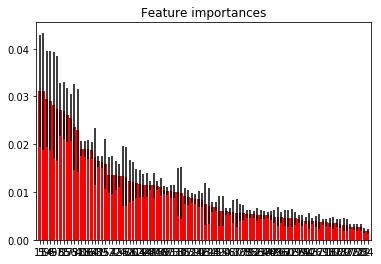

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

maxval = len(featureList)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1])[:maxval], importances[indices][:maxval],
       color="r", yerr=std[indices][:maxval], align="center")
plt.xticks(range(X.shape[1])[:maxval], indices)
plt.xlim([-1, maxval])
plt.show()

# Write Submission

In [175]:
sample_df = pd.read_csv('2015/SampleSubmissionWithFeatures.csv', index_col=0)
sample_df.tail()

,id,Pred,Season,team0,team1,DayNum,7OT0,ACU0,ADE0,AP0,...,USA1,WIL1,WLK1,WMR1,WMV1,WOB1,WOL1,WTE1,YAG1,ZAM1
2273,2015_1458_1461,0.5,2015,1458,1461,136,2.0,2.0,6.0,3.0,...,NaN,81.0,106.0,NaN,NaN,62.0,57.0,NaN,NaN,NaN
2274,2015_1458_1462,0.5,2015,1458,1462,136,2.0,2.0,6.0,3.0,...,NaN,35.0,24.0,NaN,NaN,32.0,35.0,NaN,NaN,NaN
2275,2015_1459_1461,0.5,2015,1459,1461,136,78.0,68.0,58.0,NaN,...,NaN,81.0,106.0,NaN,NaN,62.0,57.0,NaN,NaN,NaN
2276,2015_1459_1462,0.5,2015,1459,1462,136,78.0,68.0,58.0,NaN,...,NaN,35.0,24.0,NaN,NaN,32.0,35.0,NaN,NaN,NaN
2277,2015_1461_1462,0.5,2015,1461,1462,136,104.0,88.0,54.0,NaN,...,NaN,35.0,24.0,NaN,NaN,32.0,35.0,NaN,NaN,NaN


In [177]:
Xsample = sample_df[rankingfeatures].values
sample_df['Pred'] = clf.predict_proba(Xsample)[:,1] # predict_proba returns [prob label is 0, prob label is 1], kaggle wants 2nd column
submission = sample_df[['id', 'Pred']]
submission.tail()

,id,Pred
2273,2015_1458_1461,0.842580
2274,2015_1458_1462,0.626374
2275,2015_1459_1461,0.444080
2276,2015_1459_1462,0.200130
2277,2015_1461_1462,0.219853


In [178]:
submission.to_csv('2015/SubmissionLR.csv', encoding='ascii', index=False)